Experiment with finding correlations between many pairs of coins.

In [90]:
# Historical snapshot of coins from December 01, 2019: https://coinmarketcap.com/historical/20191201/ used to
# get a representative set of coins from before the period of analysis to avoid look-ahead bias.

strat_7_univ = [
    'BTCUSDT', 'ETHUSDT', 'XRPUSDT', 'BCHUSDT', 'LTCUSDT', 'EOSUSDT', 'BNBUSDT',
    'XLMUSDT', 'TRXUSDT', 'ADAUSDT', 'XTZUSDT', 'LINKUSDT', 'ATOMUSDT',
    'NEOUSDT', 'MKRUSDT', 'DASHUSDT', 'ETCUSDT', 'USDCUSDT', 'ONTUSDT', 'VETUSDT',
    'DOGEUSDT', 'BATUSDT', 'ZECUSDT',
    'SNXUSDT', 'QTUMUSDT', 'TUSDUSDT', 'ZRXUSDT',
    'THXUSDT', 'THRUSDT', 'ALGOUSDT', 'REPUSDT', 'NANOUSDT', 'KBCUSDT', 'BTGUSDT', 'RVNUSDT', 'OMGUSDT',
    'CNXUSDT', 'ABBCUSDT', 'XINUSDT', 'VSYSUSDT', 'SEELEUSDT', 'EONUSDT', 'ZBUSDT', 'EKTUSDT', 'DGBUSDT',
    'BTMUSDT', 'LSKUSDT', 'KMDUSDT', 'SAIUSDT', 'LUNAUSDT', 'KCSUSDT', 'FTTUSDT', 'QNTUSDT', 'SXPUSDT',
    'BDXUSDT', 'GAPUSDT', 'BCDUSDT', 'THETAUSDT', 'ICXUSDT', 'FSTUSDT', 'MATICUSDT', 'SCUSDT', 'EVRUSDT',
    'BTTUSDT', 'MOFUSDT', 'IOSTUSDT', 'MCOUSDT', 'WAVESUSDT', 'XVGUSDT', 'MONAUSDT', 'BTSUSDT', 'BCNUSDT',
    'HCUSDT', 'MAIDUSDT', 'NEXOUSDT', 'ARDRUSDT', 'DXUSDT', 'OKBUSDT', 'FXCUSDT', 'RLCUSDT', 'MBUSDT',
    'BXKUSDT', 'AEUSDT', 'ENJUSDT', 'STEEMUSDT', 'SLVUSDT', 'BRZEUSDT', 'ZILUSDT', 'VESTUSDT', 'ZENUSDT',
    'SOLVEUSDT', 'CHZUSDT', 'NOAHUSDT', 'LAUSDT', 'BTMXUSDT', 'ETNUSDT', 'ENGUSDT', 'ILCUSDT', 'NPXSUSDT',
    'CRPTUSDT', 'GNTUSDT', 'SNTUSDT', 'ELFUSDT', 'JWLUSDT', 'FETUSDT', 'BOTXUSDT', 'NRGUSDT', 'DGDUSDT',
    'EXMRUSDT', 'EURSUSDT', 'AOAUSDT', 'RIFUSDT', 'CIX100USDT', 'BFUSDT', 'XZCUSDT', 'FABUSDT', 'GRINUSDT',
    'NETUSDT', 'VERIUSDT', 'DGTXUSDT', 'KNCUSDT', 'RENUSDT', 'STRATUSDT', 'ETPUSDT', 'NEXUSDT', 'NEWUSDT',
    'BCZEROUSDT', 'GXCUSDT', 'TNTUSDT', 'BTC2USDT', 'PPTUSDT', 'USDKUSDT', 'ELAUSDT', 'IGNISUSDT', 'PLCUSDT',
    'BNKUSDT', 'DTRUSDT', 'RCNUSDT', 'HPTUSDT', 'LAMBUSDT', 'MANAUSDT', 'EDCUSDT', 'BEAMUSDT', 'TTUSDT',
    'AIONUSDT', 'BZUSDT', 'WTCUSDT', 'WICCUSDT', 'LRCUSDT', 'BRDUSDT', 'FCTUSDT', 'NULSUSDT', 'FTMUSDT',
    'IOTXUSDT', 'QBITUSDT', 'XMXUSDT', 'YOUUSDT', 'NASUSDT', 'WAXPUSDT', 'ARKUSDT', 'RDDUSDT', 'GNYUSDT',
    'AGVCUSDT', 'HYNUSDT', 'CVCUSDT', 'WANUSDT', 'WINUSDT', 'LINAUSDT', 'RUSDT', 'PAIUSDT', 'FSNUSDT',
    'FUNUSDT', 'DPTUSDT', 'BHDUSDT', 'LOOMUSDT', 'XACUSDT', 'BUSDUSDT', 'BHPUSDT', 'TRUEUSDT', 'LOKIUSDT',
    'QASHUSDT', 'BNTUSDT', 'DOTUSDT', 'SOLUSDT']

In [91]:
from binance.client import Client as bnb_client
from binance.client import BinanceAPIException
from datetime import datetime
import pandas as pd

client = bnb_client(tld='US')

def get_price_data_for_coin(coin, freq, start_date):
    bn_data = client.get_historical_klines(coin, freq, start_date)
    columns = ['open_time','open','high','low','close','volume','close_time','quote_volume',
        'num_trades','taker_base_volume','taker_quote_volume','ignore']

    bn_data = pd.DataFrame(bn_data, columns=columns)
    bn_data['open_time'] = bn_data['open_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    bn_data['close_time'] = bn_data['close_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    return bn_data


def get_price_data_for_universe(freq, start_date):
    px_data = {}

    for coin in strat_7_univ:
        try:
            px_data[coin] = get_price_data_for_coin(coin, freq, start_date).set_index('open_time')
            print(f"Downloaded data for {coin}.")
        except BinanceAPIException:
            print(f"Couldn't load data for {coin}.")
    
    return px_data

In [92]:
data_freq = '4h'
look_back_window_size = 30 * 6
look_back_min_periods = 10 * 6

px_data = get_price_data_for_universe(data_freq, '2020-01-01')

Downloaded data for BTCUSDT.
Downloaded data for ETHUSDT.
Downloaded data for XRPUSDT.
Downloaded data for BCHUSDT.
Downloaded data for LTCUSDT.
Downloaded data for EOSUSDT.
Downloaded data for BNBUSDT.
Downloaded data for XLMUSDT.
Downloaded data for TRXUSDT.
Downloaded data for ADAUSDT.
Downloaded data for XTZUSDT.
Downloaded data for LINKUSDT.
Downloaded data for ATOMUSDT.
Downloaded data for NEOUSDT.
Downloaded data for MKRUSDT.
Downloaded data for DASHUSDT.
Downloaded data for ETCUSDT.
Downloaded data for USDCUSDT.
Downloaded data for ONTUSDT.
Downloaded data for VETUSDT.
Downloaded data for DOGEUSDT.
Downloaded data for BATUSDT.
Downloaded data for ZECUSDT.
Downloaded data for SNXUSDT.
Downloaded data for QTUMUSDT.
Downloaded data for TUSDUSDT.
Downloaded data for ZRXUSDT.
Couldn't load data for THXUSDT.
Couldn't load data for THRUSDT.
Downloaded data for ALGOUSDT.
Couldn't load data for REPUSDT.
Couldn't load data for NANOUSDT.
Couldn't load data for KBCUSDT.
Couldn't load data 

In [149]:
px_close = {coin: px_data[coin]["close"] for coin in px_data}
px_close = pd.DataFrame(px_close)
# px_close.set_index("open_time", inplace=True)
px_close.index.rename("date", inplace=True)
px_close = px_close.astype(float)

px_close

,BTCUSDT,ETHUSDT,XRPUSDT,BCHUSDT,LTCUSDT,EOSUSDT,BNBUSDT,XLMUSDT,TRXUSDT,ADAUSDT,...,MANAUSDT,LRCUSDT,FTMUSDT,IOTXUSDT,WAXPUSDT,LOOMUSDT,BUSDUSDT,BNTUSDT,DOTUSDT,SOLUSDT
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,7230.71,130.18,0.19406,205.64,41.58,NaN,13.8159,0.04515,NaN,0.03308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,7205.50,130.52,0.19518,206.72,41.55,NaN,13.7648,0.04493,NaN,0.03320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,7195.80,130.84,0.19358,205.61,41.67,NaN,13.7162,0.04509,NaN,0.03321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 12:00:00,7233.02,131.84,0.19428,206.63,41.89,NaN,13.7958,0.04542,NaN,0.03357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 16:00:00,7223.72,131.98,0.19474,206.35,41.79,NaN,13.7270,0.04547,NaN,0.03361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-18 16:00:00,104439.13,3286.22,3.21380,469.40,125.69,0.9051,705.2200,0.48090,NaN,1.07230,...,0.5205,0.1963,0.6867,0.04631,0.04657,0.06007,NaN,0.665,6.981,255.87
2025-01-18 20:00:00,104499.99,3307.76,3.27670,465.20,125.76,0.9284,710.5000,0.49130,NaN,1.10220,...,0.5189,0.1942,0.6827,0.04657,0.04657,0.06007,NaN,0.664,6.957,261.56
2025-01-19 00:00:00,105026.35,3335.78,3.25510,462.90,124.65,0.9100,711.0600,0.48590,NaN,1.08540,...,0.5268,0.1996,0.6735,0.04641,0.04657,0.06007,NaN,0.664,7.053,255.76


In [150]:
in_sample_end = pd.to_datetime("2022-12-31 20:00:00")
out_sample_start = in_sample_end + pd.DateOffset(hours=4)

px_close_in_sample = px_close.loc[:in_sample_end]
px_close_out_sample = px_close.loc[out_sample_start:]

px_close_in_sample
# px_close_out_sample

,BTCUSDT,ETHUSDT,XRPUSDT,BCHUSDT,LTCUSDT,EOSUSDT,BNBUSDT,XLMUSDT,TRXUSDT,ADAUSDT,...,MANAUSDT,LRCUSDT,FTMUSDT,IOTXUSDT,WAXPUSDT,LOOMUSDT,BUSDUSDT,BNTUSDT,DOTUSDT,SOLUSDT
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,7230.71,130.18,0.19406,205.64,41.58,NaN,13.8159,0.04515,NaN,0.03308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,7205.50,130.52,0.19518,206.72,41.55,NaN,13.7648,0.04493,NaN,0.03320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,7195.80,130.84,0.19358,205.61,41.67,NaN,13.7162,0.04509,NaN,0.03321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 12:00:00,7233.02,131.84,0.19428,206.63,41.89,NaN,13.7958,0.04542,NaN,0.03357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 16:00:00,7223.72,131.98,0.19474,206.35,41.79,NaN,13.7270,0.04547,NaN,0.03361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 04:00:00,16565.53,1197.04,NaN,97.21,67.89,0.858,245.5269,0.07191,0.05455,0.24445,...,0.2945,0.1874,0.1983,NaN,0.0417,NaN,1.0003,0.325,4.34,9.8138
2022-12-31 08:00:00,16565.77,1197.13,NaN,97.60,68.27,0.862,245.7466,0.07182,0.05455,0.24670,...,0.2945,0.1879,0.1992,NaN,0.0419,NaN,1.0003,0.325,4.36,9.8432
2022-12-31 12:00:00,16587.69,1202.01,NaN,97.60,70.09,0.866,247.0076,0.07189,0.05466,0.25008,...,0.2945,0.1915,0.2012,NaN,0.0418,NaN,1.0005,0.328,4.39,10.1323


In [151]:
corr_matrix = px_close_in_sample.corr()
high_corr_map = dict()
corr_match_map = dict()

def get_max_entry(high_corr_map):
    max_corr = -1.0
    max_key = None
    for key in high_corr_map.keys():
        if high_corr_map[key] > max_corr:
            max_corr = high_corr_map[key]
            max_key = key
    return max_key[0], max_key[1], max_corr

for coin_a in corr_matrix.index:
    for coin_b in corr_matrix.index:
        if coin_a < coin_b and corr_matrix[coin_a][coin_b] > 0.9:
            #print(coin_a, coin_b, corr_matrix[coin_a][coin_b])
            high_corr_map[(coin_a, coin_b)] = corr_matrix[coin_a][coin_b]

while len(high_corr_map) > 0:
    coin_a, coin_b, corr_a_b = get_max_entry(high_corr_map)
    del high_corr_map[(coin_a, coin_b)]
    if coin_a not in corr_match_map and coin_b not in corr_match_map:
        corr_match_map[coin_a] = (coin_b, corr_a_b)
        corr_match_map[coin_b] = (coin_a, corr_a_b)

corr_match_map

{'OMGUSDT': ('ZENUSDT', 0.9927769545486754),
 'ZENUSDT': ('OMGUSDT', 0.9927769545486754),
 'DOTUSDT': ('XLMUSDT', 0.9908822490589636),
 'XLMUSDT': ('DOTUSDT', 0.9908822490589636),
 'ADAUSDT': ('ENJUSDT', 0.9867785609306907),
 'ENJUSDT': ('ADAUSDT', 0.9867785609306907),
 'WAXPUSDT': ('ZRXUSDT', 0.985901456993207),
 'ZRXUSDT': ('WAXPUSDT', 0.985901456993207),
 'LRCUSDT': ('VETUSDT', 0.9804799681243638),
 'VETUSDT': ('LRCUSDT', 0.9804799681243638),
 'ALGOUSDT': ('LINKUSDT', 0.9784984066312689),
 'LINKUSDT': ('ALGOUSDT', 0.9784984066312689),
 'BCHUSDT': ('BNTUSDT', 0.9749863918865764),
 'BNTUSDT': ('BCHUSDT', 0.9749863918865764),
 'MANAUSDT': ('NEOUSDT', 0.9734164474679909),
 'NEOUSDT': ('MANAUSDT', 0.9734164474679909),
 'EOSUSDT': ('ETHUSDT', 0.9678384266699815),
 'ETHUSDT': ('EOSUSDT', 0.9678384266699815),
 'LSKUSDT': ('ONTUSDT', 0.9616161041688697),
 'ONTUSDT': ('LSKUSDT', 0.9616161041688697),
 'ATOMUSDT': ('MATICUSDT', 0.9588994254753952),
 'MATICUSDT': ('ATOMUSDT', 0.9588994254753952)

In [152]:
seen_coins = set()
high_corr_pairs = set()

for k, v in corr_match_map.items():
    if k not in seen_coins:
        seen_coins.add(k)
        seen_coins.add(v[0])
        high_corr_pairs.add((k, v[0]))

high_corr_pairs

{('ADAUSDT', 'ENJUSDT'),
 ('ALGOUSDT', 'LINKUSDT'),
 ('ATOMUSDT', 'MATICUSDT'),
 ('BATUSDT', 'THETAUSDT'),
 ('BCHUSDT', 'BNTUSDT'),
 ('BTCUSDT', 'ZECUSDT'),
 ('BUSDUSDT', 'USDCUSDT'),
 ('DOGEUSDT', 'ETCUSDT'),
 ('DOTUSDT', 'XLMUSDT'),
 ('EOSUSDT', 'ETHUSDT'),
 ('FTMUSDT', 'LTCUSDT'),
 ('KNCUSDT', 'QNTUSDT'),
 ('LRCUSDT', 'VETUSDT'),
 ('LSKUSDT', 'ONTUSDT'),
 ('MANAUSDT', 'NEOUSDT'),
 ('OMGUSDT', 'ZENUSDT'),
 ('QTUMUSDT', 'SNXUSDT'),
 ('WAXPUSDT', 'ZRXUSDT')}

In [153]:
def get_beta_alpha_residuals(px_close_in_sample, high_corr_pairs, interval, look_back_min_periods):
    beta_dict = dict()
    alpha_dict = dict()
    residual_dict = dict()
    
    for coin_a, coin_b in high_corr_pairs:
        px_coin_a = px_close_in_sample[coin_a]
        px_coin_b = px_close_in_sample[coin_b]
        cov_a_b = px_coin_a.rolling(window=interval, min_periods=look_back_min_periods).cov(px_coin_b)
        var_a = px_coin_a.rolling(window=interval, min_periods=look_back_min_periods).var()
        beta_a_to_b = cov_a_b / var_a
        beta_dict["beta_" + coin_a + "_to_" + coin_b] = beta_a_to_b
        
        a_mean = px_coin_a.rolling(window=interval, min_periods=look_back_min_periods).mean()
        b_mean = px_coin_b.rolling(window=interval, min_periods=look_back_min_periods).mean()
        alpha_a_to_b = b_mean - a_mean * beta_a_to_b
        alpha_dict["alpha_" + coin_a + "_to_" + coin_b] = alpha_a_to_b
        
        residual_dict["res_" + coin_a + "_to_" + coin_b] = px_coin_b - alpha_a_to_b - beta_a_to_b * px_coin_a
        
    beta_df = pd.DataFrame(beta_dict, index=px_close_in_sample.index)
    alpha_df = pd.DataFrame(alpha_dict, index=px_close_in_sample.index)
    residual_df = pd.DataFrame(residual_dict, index=px_close_in_sample.index)
    
    return (beta_df, alpha_df, residual_df)

In [154]:
trailing_90d_beta = pd.DataFrame(index=px_close_in_sample.index)

# for (coin_a, coin_b) in high_corr_pairs:
    

# trailing_90d_beta

cov_OMG_ZEN = px_close_in_sample['OMGUSDT'].rolling(window=look_back_window_size, min_periods=look_back_min_periods).cov(px_close_in_sample['ZENUSDT'])
var_OMG = px_close_in_sample['OMGUSDT'].rolling(window=look_back_window_size, min_periods=look_back_min_periods).var()
beta_OMG_to_ZEN = cov_OMG_ZEN / var_OMG

In [155]:
OMG_mean = px_close_in_sample['OMGUSDT'].rolling(window=look_back_window_size, min_periods=look_back_min_periods).mean()
ZEN_mean = px_close_in_sample['ZENUSDT'].rolling(window=look_back_window_size, min_periods=look_back_min_periods).mean()

In [156]:
alpha_OMG_to_ZEN = ZEN_mean - OMG_mean * beta_OMG_to_ZEN
alpha_OMG_to_ZEN

date
2020-01-01 00:00:00         NaN
2020-01-01 04:00:00         NaN
2020-01-01 08:00:00         NaN
2020-01-01 12:00:00         NaN
2020-01-01 16:00:00         NaN
                         ...   
2022-12-31 04:00:00   -0.083006
2022-12-31 08:00:00   -0.120030
2022-12-31 12:00:00   -0.159639
2022-12-31 16:00:00   -0.202816
2022-12-31 20:00:00   -0.227885
Length: 6571, dtype: float64

In [157]:
px_close_in_sample['ZENUSDT'] - alpha_OMG_to_ZEN - px_close_in_sample['OMGUSDT'] * beta_OMG_to_ZEN

date
2020-01-01 00:00:00         NaN
2020-01-01 04:00:00         NaN
2020-01-01 08:00:00         NaN
2020-01-01 12:00:00         NaN
2020-01-01 16:00:00         NaN
                         ...   
2022-12-31 04:00:00    0.078901
2022-12-31 08:00:00    0.186788
2022-12-31 12:00:00    0.166779
2022-12-31 16:00:00    0.135708
2022-12-31 20:00:00    0.195781
Length: 6571, dtype: float64

<Axes: xlabel='date'>

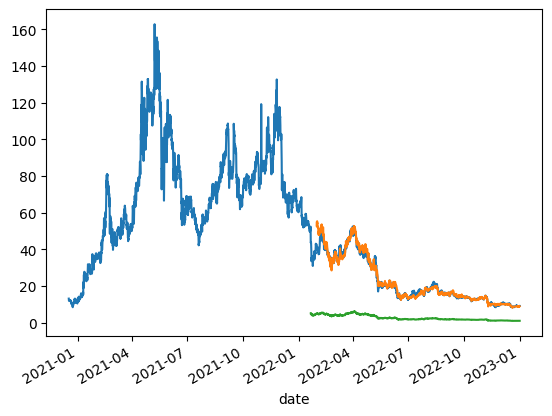

In [158]:
px_close_in_sample['ZENUSDT'].plot()
(alpha_OMG_to_ZEN + px_close_in_sample['OMGUSDT'] * beta_OMG_to_ZEN).plot()
px_close_in_sample['OMGUSDT'].plot()

In [162]:
beta_df, alpha_df, residual_df = get_beta_alpha_residuals(
    px_close_in_sample, high_corr_pairs, look_back_window_size, look_back_min_periods)
residual_df

,res_ALGOUSDT_to_LINKUSDT,res_ATOMUSDT_to_MATICUSDT,res_DOTUSDT_to_XLMUSDT,res_OMGUSDT_to_ZENUSDT,res_QTUMUSDT_to_SNXUSDT,res_FTMUSDT_to_LTCUSDT,res_WAXPUSDT_to_ZRXUSDT,res_LSKUSDT_to_ONTUSDT,res_BUSDUSDT_to_USDCUSDT,res_BTCUSDT_to_ZECUSDT,res_DOGEUSDT_to_ETCUSDT,res_LRCUSDT_to_VETUSDT,res_MANAUSDT_to_NEOUSDT,res_EOSUSDT_to_ETHUSDT,res_ADAUSDT_to_ENJUSDT,res_KNCUSDT_to_QNTUSDT,res_BATUSDT_to_THETAUSDT,res_BCHUSDT_to_BNTUSDT
date,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 04:00:00,-0.329218,-0.083771,-0.000702,0.078901,0.028995,2.666004,0.000113,-0.013732,0.000349,-2.218132,0.291281,0.000453,-0.085836,-1.923376,-0.008246,4.416808,0.010841,-0.000511
2022-12-31 08:00:00,-0.292005,-0.087308,-0.001026,0.186788,0.040129,2.771184,-0.000326,-0.010910,0.000263,-2.185873,0.140495,0.000551,-0.077867,-3.861872,-0.007059,4.361202,0.010197,-0.002108
2022-12-31 12:00:00,-0.280746,-0.080939,-0.001307,0.166779,0.016796,4.022457,0.000356,-0.010396,0.000244,-1.926169,0.304763,0.000384,-0.075308,-1.049094,-0.006856,5.031019,0.014297,0.000873


In [163]:
beta_df

,beta_ALGOUSDT_to_LINKUSDT,beta_ATOMUSDT_to_MATICUSDT,beta_DOTUSDT_to_XLMUSDT,beta_OMGUSDT_to_ZENUSDT,beta_QTUMUSDT_to_SNXUSDT,beta_FTMUSDT_to_LTCUSDT,beta_WAXPUSDT_to_ZRXUSDT,beta_LSKUSDT_to_ONTUSDT,beta_BUSDUSDT_to_USDCUSDT,beta_BTCUSDT_to_ZECUSDT,beta_DOGEUSDT_to_ETCUSDT,beta_LRCUSDT_to_VETUSDT,beta_MANAUSDT_to_NEOUSDT,beta_EOSUSDT_to_ETHUSDT,beta_ADAUSDT_to_ENJUSDT,beta_KNCUSDT_to_QNTUSDT,beta_BATUSDT_to_THETAUSDT,beta_BCHUSDT_to_BNTUSDT
date,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 04:00:00,20.968476,0.101433,0.012212,8.828227,0.966064,269.456164,2.432112,0.204729,0.108348,0.007966,136.135573,0.062735,7.888265,565.694118,0.855091,109.894042,2.532634,0.004180
2022-12-31 08:00:00,20.957541,0.102117,0.012190,8.865471,0.964807,268.147013,2.438827,0.205199,0.074155,0.008008,136.218439,0.062465,7.928747,565.535438,0.857039,109.874304,2.508567,0.004181
2022-12-31 12:00:00,20.891614,0.102195,0.012169,8.905087,0.966645,268.593021,2.445890,0.205644,0.085575,0.008047,135.955225,0.062429,7.989697,565.601617,0.859467,109.521709,2.484186,0.004179


In [186]:
def get_normalized_residuals(residual_df, interval, look_back_min_periods):
    demeaned_residuals = residual_df.subtract(residual_df.rolling(window=interval, min_periods=look_back_min_periods).mean(), axis=0)
    normalized_residuals = demeaned_residuals.divide(residual_df.rolling(window=interval, min_periods=look_back_min_periods).std(), axis=0)
    return normalized_residuals

In [188]:
normalized_residuals = get_normalized_residuals(residual_df, look_back_window_size, look_back_min_periods)
normalized_residuals

,res_ALGOUSDT_to_LINKUSDT,res_ATOMUSDT_to_MATICUSDT,res_DOTUSDT_to_XLMUSDT,res_OMGUSDT_to_ZENUSDT,res_QTUMUSDT_to_SNXUSDT,res_FTMUSDT_to_LTCUSDT,res_WAXPUSDT_to_ZRXUSDT,res_LSKUSDT_to_ONTUSDT,res_BUSDUSDT_to_USDCUSDT,res_BTCUSDT_to_ZECUSDT,res_DOGEUSDT_to_ETCUSDT,res_LRCUSDT_to_VETUSDT,res_MANAUSDT_to_NEOUSDT,res_EOSUSDT_to_ETHUSDT,res_ADAUSDT_to_ENJUSDT,res_KNCUSDT_to_QNTUSDT,res_BATUSDT_to_THETAUSDT,res_BCHUSDT_to_BNTUSDT
date,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 04:00:00,-0.662493,-2.244286,0.461731,-0.467822,0.403972,0.624856,-0.047856,-1.016506,1.485723,-0.743768,1.559278,2.171684,-0.544690,-0.049507,-1.868753,0.630855,0.419990,0.185253
2022-12-31 08:00:00,-0.584466,-2.286832,0.246898,-0.010789,0.515354,0.661006,-0.192391,-0.612033,1.285050,-0.723712,1.360986,2.399508,-0.508631,-0.109792,-1.637854,0.607141,0.399103,0.039218
2022-12-31 12:00:00,-0.555283,-2.089827,0.061832,-0.103165,0.260197,0.917785,0.012184,-0.534779,1.237885,-0.625186,1.539741,1.926429,-0.494201,-0.009288,-1.580849,0.785476,0.567273,0.289985


In [165]:
import re

x = "res_ALGOUSDT_to_LINKUSDT"
p = re.compile('res_([A-Z]+)_to_([A-Z]+)')
m = p.match(x)
m.group(2)

'LINKUSDT'

In [166]:
import re

def create_raw_holdings_df(corr_match_map, normalized_residuals, threshold):
    holdings_df = pd.DataFrame(0.0, columns=corr_match_map.keys(), index=normalized_residuals.index)

    reg_exp = re.compile('res_([A-Z]+)_to_([A-Z]+)')

    for entry_date, row in normalized_residuals.iterrows():
        for item in row.items():
            if not pd.isnull(item[1]) and item[1] > threshold:
                res_column = item[0]
                reg_exp_match = reg_exp.match(res_column)
                dependent_coin = reg_exp_match.group(1)
                independent_coin = reg_exp_match.group(2)

                holdings_df.loc[entry_date, independent_coin] = -1.0
                beta_column = "beta" + res_column[3:]
                holdings_df.loc[entry_date, dependent_coin] = beta_df.loc[entry_date, beta_column]
            elif not pd.isnull(item[1]) and item[1] < -threshold:
                res_column = item[0]
                reg_exp_match = reg_exp.match(res_column)
                dependent_coin = reg_exp_match.group(1)
                independent_coin = reg_exp_match.group(2)

                holdings_df.loc[entry_date, independent_coin] = 1.0
                beta_column = "beta" + res_column[3:]
                holdings_df.loc[entry_date, dependent_coin] = -beta_df.loc[entry_date, beta_column]

                #print(entry_date, dependent_coin, independent_coin)
    return holdings_df.shift()

In [167]:
threshold = 1.0

raw_holdings_df = create_raw_holdings_df(corr_match_map, normalized_residuals, threshold)
raw_holdings_df.tail(10)

,OMGUSDT,ZENUSDT,DOTUSDT,XLMUSDT,ADAUSDT,ENJUSDT,WAXPUSDT,ZRXUSDT,LRCUSDT,VETUSDT,...,BUSDUSDT,USDCUSDT,DOGEUSDT,ETCUSDT,KNCUSDT,QNTUSDT,BATUSDT,THETAUSDT,FTMUSDT,LTCUSDT
date,,,,,,,,,,,,,,,,,,,,,
2022-12-30 08:00:00,0.0,0.0,0.000000,0.0,-0.839181,1.0,-2.425386,1.0,0.000000,0.0,...,0.231990,-1.0,136.961629,-1.0,105.776225,-1.0,0.0,0.0,0.0,0.0
2022-12-30 12:00:00,0.0,0.0,0.012391,-1.0,-0.841612,1.0,-2.425690,1.0,0.000000,0.0,...,0.204315,-1.0,136.899104,-1.0,106.796500,-1.0,0.0,0.0,0.0,0.0
2022-12-30 16:00:00,0.0,0.0,0.012345,-1.0,-0.844987,1.0,-2.428035,1.0,0.063479,-1.0,...,0.170193,-1.0,136.912216,-1.0,0.000000,0.0,0.0,0.0,0.0,0.0
2022-12-30 20:00:00,0.0,0.0,0.000000,0.0,-0.848467,1.0,-2.434354,1.0,0.063423,-1.0,...,0.158768,-1.0,136.703228,-1.0,0.000000,0.0,0.0,0.0,0.0,0.0
2022-12-31 00:00:00,0.0,0.0,0.000000,0.0,-0.850921,1.0,0.000000,0.0,0.063198,-1.0,...,0.150969,-1.0,136.556858,-1.0,110.082722,-1.0,0.0,0.0,0.0,0.0
2022-12-31 04:00:00,0.0,0.0,0.000000,0.0,-0.852929,1.0,0.000000,0.0,0.062972,-1.0,...,0.119383,-1.0,136.369210,-1.0,109.465651,-1.0,0.0,0.0,0.0,0.0
2022-12-31 08:00:00,0.0,0.0,0.000000,0.0,-0.855091,1.0,0.000000,0.0,0.062735,-1.0,...,0.108348,-1.0,136.135573,-1.0,0.000000,0.0,0.0,0.0,0.0,0.0
2022-12-31 12:00:00,0.0,0.0,0.000000,0.0,-0.857039,1.0,0.000000,0.0,0.062465,-1.0,...,0.074155,-1.0,136.218439,-1.0,0.000000,0.0,0.0,0.0,0.0,0.0
2022-12-31 16:00:00,0.0,0.0,0.000000,0.0,-0.859467,1.0,0.000000,0.0,0.062429,-1.0,...,0.085575,-1.0,135.955225,-1.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [181]:
def get_normalized_holdings_df(raw_holdings_df):
    normalized_holdings_df = raw_holdings_df.divide(raw_holdings_df.abs().sum(axis=1), axis=0)
    return normalized_holdings_df.fillna(0.0)

In [182]:
normalized_holdings_df = get_normalized_holdings_df(raw_holdings_df)
normalized_holdings_df

,OMGUSDT,ZENUSDT,DOTUSDT,XLMUSDT,ADAUSDT,ENJUSDT,WAXPUSDT,ZRXUSDT,LRCUSDT,VETUSDT,...,BUSDUSDT,USDCUSDT,DOGEUSDT,ETCUSDT,KNCUSDT,QNTUSDT,BATUSDT,THETAUSDT,FTMUSDT,LTCUSDT
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
2020-01-01 04:00:00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
2020-01-01 08:00:00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
2020-01-01 12:00:00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
2020-01-01 16:00:00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 04:00:00,0.0,0.0,0.0,0.0,-0.003372,0.003953,0.0,0.0,0.000249,-0.003953,...,0.000472,-0.003953,0.539071,-0.003953,0.43272,-0.003953,0.0,0.0,0.0,0.0
2022-12-31 08:00:00,0.0,0.0,0.0,0.0,-0.005960,0.006970,0.0,0.0,0.000437,-0.006970,...,0.000755,-0.006970,0.948892,-0.006970,0.00000,0.000000,0.0,0.0,0.0,0.0
2022-12-31 12:00:00,0.0,0.0,0.0,0.0,-0.006022,0.007027,0.0,0.0,0.000439,-0.007027,...,0.000521,-0.007027,0.957167,-0.007027,0.00000,0.000000,0.0,0.0,0.0,0.0


In [193]:
def calculate_holdings_returns(px_close_df, normalized_holdings_df):
    px_returns = px_close_df / px_close_df.shift() - 1
    return (px_returns * normalized_holdings_df).sum(axis=1)

<Axes: xlabel='date'>

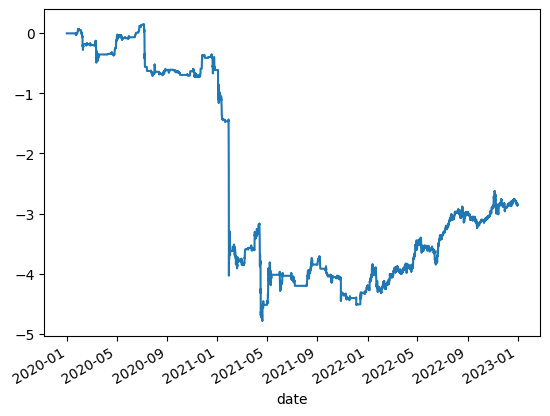

In [194]:
strategy_returns = calculate_holdings_returns(px_close_in_sample, normalized_holdings_df)
strategy_returns.cumsum().plot()

In [195]:
def get_strategy_returns(px_close_df, corr_match_map, high_corr_pairs, interval, look_back_min_periods, threshold):
    beta_df, alpha_df, residuals_df = get_beta_alpha_residuals(
        px_close_df, high_corr_pairs, interval, look_back_min_periods)
    normalized_residuals = get_normalized_residuals(residuals_df, look_back_window_size, look_back_min_periods)
    raw_holdings_df = create_raw_holdings_df(corr_match_map, normalized_residuals, threshold)
    normalized_holdings_df = get_normalized_holdings_df(raw_holdings_df)
    
    return calculate_holdings_returns(px_close_df, normalized_holdings_df)

In [197]:
in_sample_strategy_returns = get_strategy_returns(
    px_close_in_sample, corr_match_map, high_corr_pairs, look_back_window_size, look_back_min_periods, 1.0)
in_sample_strategy_returns

date
2020-01-01 00:00:00    0.000000
2020-01-01 04:00:00    0.000000
2020-01-01 08:00:00    0.000000
2020-01-01 12:00:00    0.000000
2020-01-01 16:00:00    0.000000
                         ...   
2022-12-31 04:00:00    0.006426
2022-12-31 08:00:00    0.015223
2022-12-31 12:00:00    0.003994
2022-12-31 16:00:00   -0.000288
2022-12-31 20:00:00   -0.006173
Length: 6571, dtype: float64

<Axes: xlabel='date'>

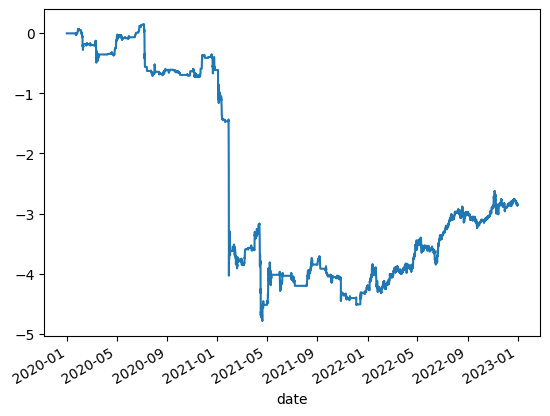

In [198]:
in_sample_strategy_returns.cumsum().plot()

In [199]:
all_data_strategy_returns = get_strategy_returns(
    px_close, corr_match_map, high_corr_pairs, look_back_window_size, look_back_min_periods, 1.0)
all_data_strategy_returns

KeyError: Timestamp('2023-01-01 00:00:00')